# Initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
data=pd.read_csv("D:\Data Science and Analytics\Casestudy 3\Add_sales_data_2018.csv")
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


# 1.  Check whether there is any relationship between the amount  spent for advertising through five different companies and profit generated. 

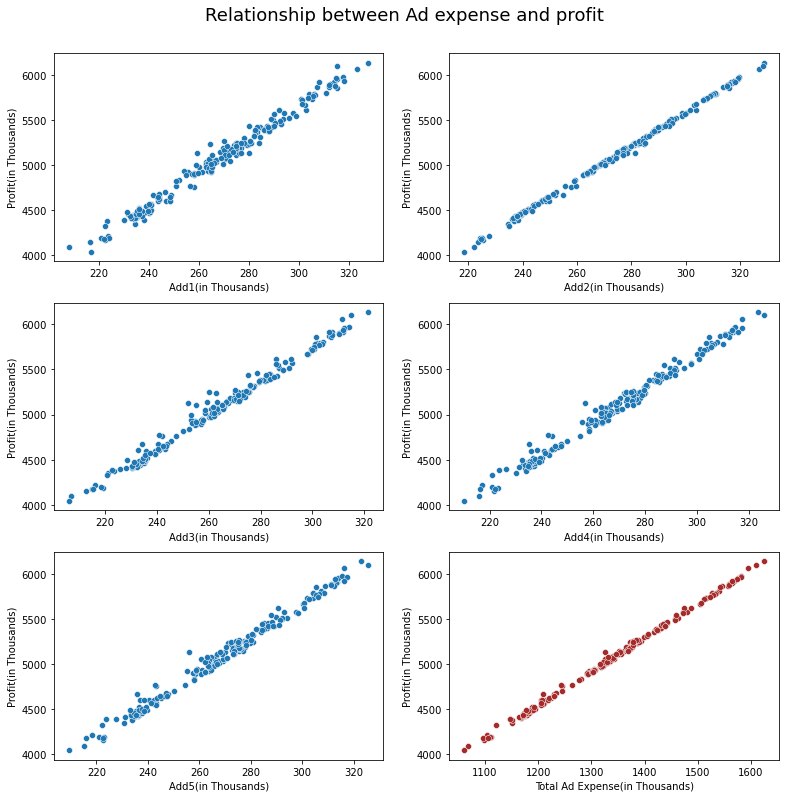

In [3]:
fig,ax= plt.subplots(figsize=(13,13))
fig.suptitle('Relationship between Ad expense and profit', fontsize=18, y=0.93)
ax1=plt.subplot(3,2,1)
sns.scatterplot(data=data, x="Add1(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,2)
sns.scatterplot(data=data, x="Add2(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,3)
sns.scatterplot(data=data, x="Add3(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,4)
sns.scatterplot(data=data, x="Add4(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,5)
sns.scatterplot(data=data, x="Add5(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,6)
ax1.set(xlabel='Total Ad Expense(in Thousands)')
data1=data.drop(["Date","Profit(in Thousands)"],axis=1).sum(axis=1)
totalsumplot=sns.scatterplot(data=data, x=data1, y="Profit(in Thousands)",ax=ax1,color="brown")
#print(data.drop(["Date","Profit(in Thousands)","Total Ads Expense (in Thousands)"],axis=1).sum(axis=1))


## Insight
### •Ad expenses on each of the five companies are positively corelated to profit gained
### •Add 2 have most stable relationship with profit gained

# 2.  Build a regression model to predict the profit from the given data and comment your findings on it.

### (i) Cleaning data

In [4]:
#checking for null values
data.isnull().sum()


Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

#### Insight
#### •The result shows that there are no null values in dataset
#### •From above scatter plot, we can say that there are no significant outliers

### (ii) Analysing correlation between different values

<AxesSubplot:>

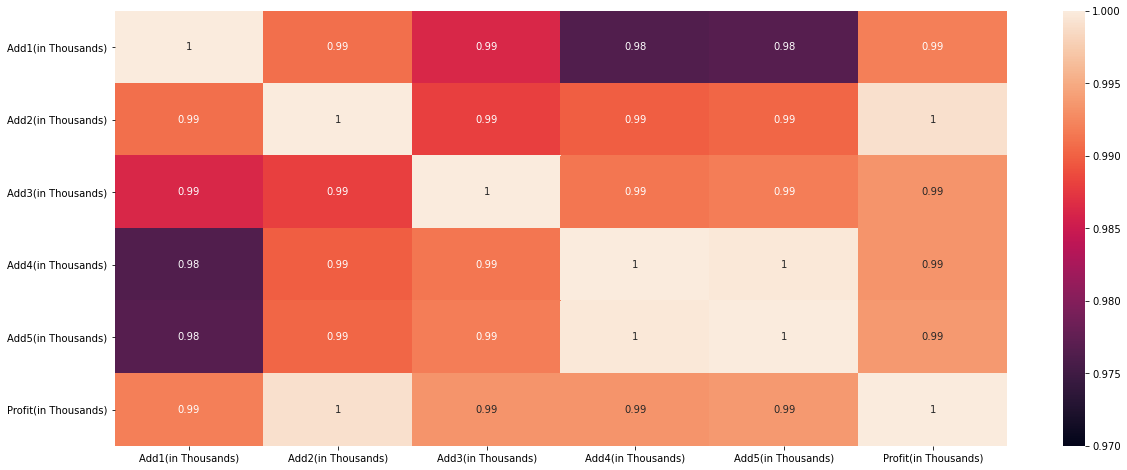

In [5]:
correlationmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(correlationmatrix,vmin=.97,vmax=1,annot=True)


### Insight
#### •All variables are highly correlated to each other

### (iii) Feature reduction

In [6]:
#Inorder to make a good prediction model, we have to select significant features and remove others depending on correlation between features
data.columns


Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [7]:
#Removing "Date" feature from data since it does not contribute to our prediction model
df1=data.drop(['Date'],axis=1)
df1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

### Insight
#### •Although Add1,Add2,Add3,Add4 and Add5 are highly correlated, including all features give us minimum mean square error.
#### •So, we will include all "add" features for making our model

### (iv) Making model

In [8]:
#Assigning dependent value to "y"
y=df1['Profit(in Thousands)']
#Assigning independent values to "x"
x=df1.drop(['Profit(in Thousands)'],axis=1)

In [9]:
#Splitting data to train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [10]:
#Making linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model= lr.fit(x_train,y_train)

#Predicting test values
predictions=model.predict(x_test)


In [11]:
#Checking for accuracy for model using predictions and test values

#1)Mean Square Error
from sklearn.metrics import mean_squared_error
print("MSE is=",mean_squared_error(y_test,predictions))

MSE is= 8.11273293080854e-25


In [12]:
#2)Coefficient of determination
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("Coefficient of determination is",r2)

Coefficient of determination is 1.0


### Insight
#### •From mean square value which is almost zero and coefficient of determination 1 we can say that we have a really good model

# 3.   Predict the profit generated by the company, if they wish to spend the following amount for advertisement. 
 
#### Add1(in Thousands) : 290 
#### Add2(in Thousands) : 312 
#### Add3(in Thousands) : 309 
#### Add4(in Thousands) : 298 
#### Add5(in Thousands) : 320

In [13]:
#organising data which has to be predicted

df2=x.iloc[:0,:].copy()
df2.loc[len(df2.index)] = [290,312,309,298,320]  
display(df2)

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290.0,312.0,309.0,298.0,320.0


In [14]:
#Prediction

predictions=model.predict(df2)
predictionValue=round(predictions[0],2)
print("According to model, the Profit(in thousands) for above ad budget =",predictionValue)

According to model, the Profit(in thousands) for above ad budget = 5820.06


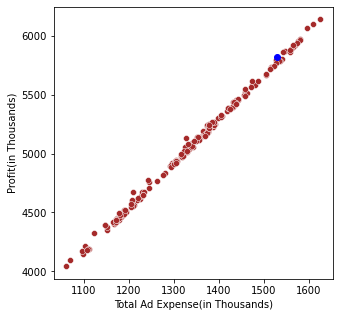

In [15]:
#Checking if prediction result is similar to other values using a graph

Total_expense_of_pdctn=df2.sum(axis=1)
fig,ax= plt.subplots(figsize=(5,5))
ax.set(xlabel='Total Ad Expense(in Thousands)')
sns.scatterplot(data=data, x=data1, y="Profit(in Thousands)",ax=ax,color="brown")
plt.scatter(x=Total_expense_of_pdctn, y=predictionValue, color='blue')

In [16]:
#We can see that prediction(blue point) falls in line with other values

## Insight
### •The profit (in thousands) predicted by model is 5820.06